# <center> RAMAS dataset

### RAMAS: THE RUSSIAN ACTED MULTIMODAL AFFECTIVE SET

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
from pydub import AudioSegment
import os
from matplotlib.pyplot import figure
%matplotlib inline

## Description

In [3]:
emotion_metadata = os.listdir('Annotations_by_emotions')
emotion_metadata

['data_Angry.csv',
 'data_Disgusted.csv',
 'data_Domination.csv',
 'data_Happy.csv',
 'data_Neutral.csv',
 'data_Sad.csv',
 'data_Scared.csv',
 'data_Shame.csv',
 'data_Submission.csv',
 'data_Surprised.csv',
 'data_Tiredness.csv']

В наборе данных представлено *11* эмоций.

In [15]:
for table in emotion_metadata:
    data = pd.read_csv('Annotations_by_emotions/' + table)
    print(table)
    print('Objects: ', data.shape[0])
    print('Objects with length > 3: ', (data['End'] - data['Start'] > 3).sum())
    print('Objects length median: ', (data['End'] - data['Start']).median())
    print()

data_Angry.csv
Objects:  1561
Objects with length > 3:  1240
Objects length median:  6.1129999999999995

data_Disgusted.csv
Objects:  1152
Objects with length > 3:  900
Objects length median:  6.424

data_Domination.csv
Objects:  2400
Objects with length > 3:  2168
Objects length median:  27.034999999999997

data_Happy.csv
Objects:  2618
Objects with length > 3:  1926
Objects length median:  5.373

data_Neutral.csv
Objects:  1269
Objects with length > 3:  1091
Objects length median:  13.059999999999999

data_Sad.csv
Objects:  1022
Objects with length > 3:  869
Objects length median:  7.161

data_Scared.csv
Objects:  1301
Objects with length > 3:  1158
Objects length median:  9.315999999999995

data_Shame.csv
Objects:  317
Objects with length > 3:  275
Objects length median:  7.640000000000043

data_Submission.csv
Objects:  2145
Objects with length > 3:  1941
Objects length median:  28.045

data_Surprised.csv
Objects:  1925
Objects with length > 3:  1279
Objects length median:  4.170000

Как видно, некоторые классы, вроде *tiredness*, представлены достаточно малым числом объектов. Объекты со слишком маленькой длиной сложно интерпретировать, поэтому в обучающую выборку их включать не следует.

In [6]:
data.head()

,ID,File,Start,End
0,11,10dec_D11_1,241.963,241.969
1,11,10dec_D11_1,241.969,244.421
2,11,10dec_D31_2,14.342,27.300
3,11,10dec_D41_1,12.040,14.140
4,11,10dec_D41_1,21.532,22.566


Каждый объект, это аудиофайл, для которого известны время начала и конца проявления данной эмоции.

## Signals

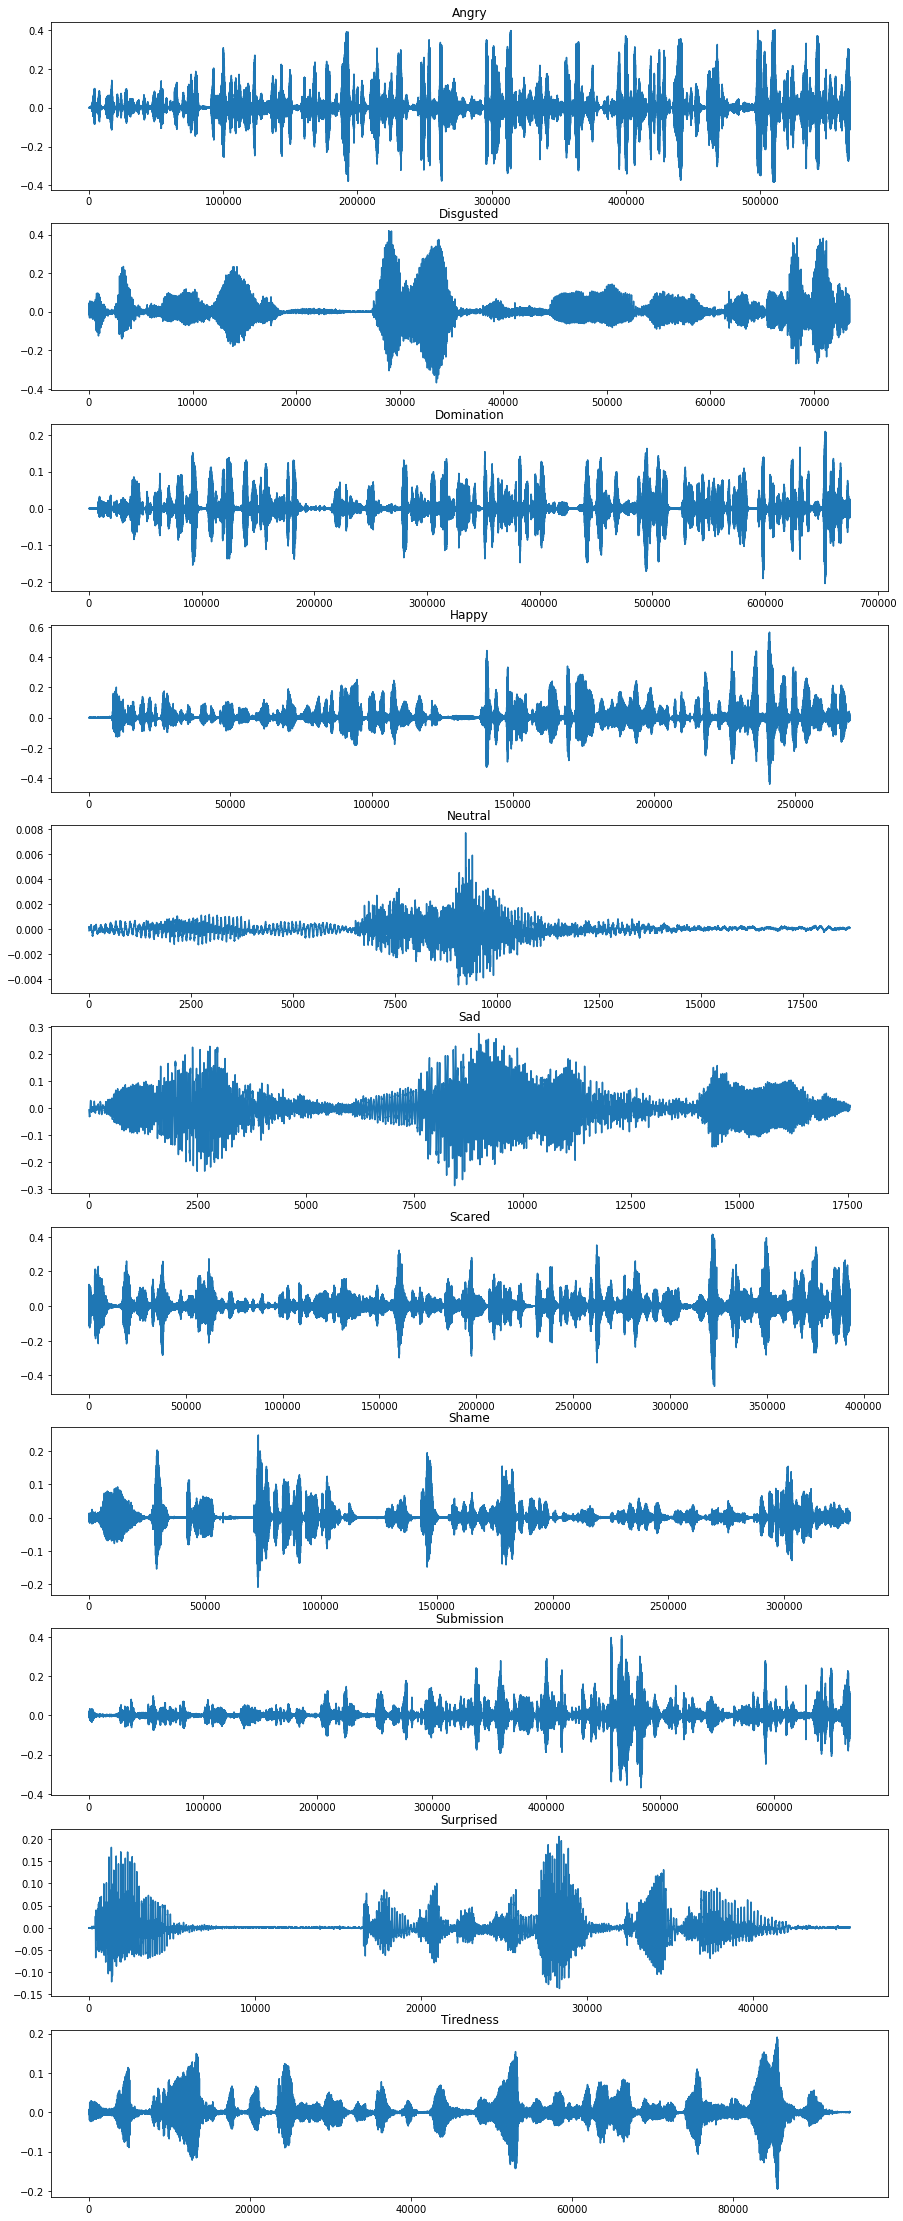

In [39]:
plt.rcParams["figure.figsize"] = (15, 40)
audio_path = 'Audio'
fig, ax = plt.subplots(11)
i = 0
for table in emotion_metadata:
    data = pd.read_csv('Annotations_by_emotions/' + table)
    row = data.iloc[5]
    file = AudioSegment.from_file(audio_path + '/' + row['File'] + '_mic.wav')
    new_file = file[row['Start'] * 1000 : row['End'] * 1000]
    new_file.export('test.wav', format='wav')
    x, sr = librosa.load('test.wav')
    ax[i].plot(x)
    ax[i].set_title(table[5:-4])
    i += 1

Видно, что графики аудиосигналов для разных эмоций семантически отличаются.

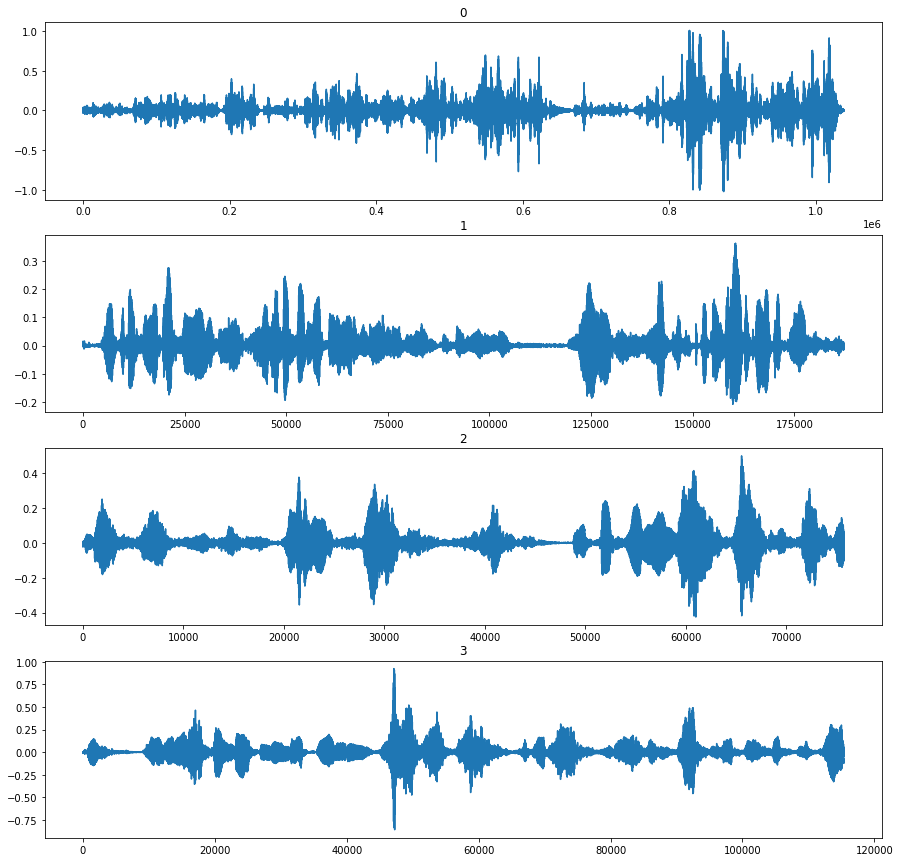

In [41]:
plt.rcParams["figure.figsize"] = (15, 15)
audio_path = 'Audio'
fig, ax = plt.subplots(4)
data = pd.read_csv('Annotations_by_emotions/' + 'data_Angry.csv')
for i in range(4):
    row = data.iloc[i + 1]
    file = AudioSegment.from_file(audio_path + '/' + row['File'] + '_mic.wav')
    new_file = file[row['Start'] * 1000 : row['End'] * 1000]
    new_file.export('test.wav', format='wav')
    x, sr = librosa.load('test.wav')
    ax[i].plot(x)
    ax[i].set_title(i)

Графики аудиосигналов для выбранной эмоции семантически схожи.

## Preprocessing

Аудиосигналы, соответствующие разным объектам, имеют разную длительность. Всвязи с этим рассмотрим два подхода. В первом будем использовать такой препроцессинг, в котором размерность ембеддинга не зависит от длительности аудиосигнала. 

Во втоором подходе мы разрежем более длинные сигналы на сигналы фиксированной длины, таком образом заодно увеличим объем выборки. 

In [46]:
from warnings import filterwarnings
filterwarnings('ignore')

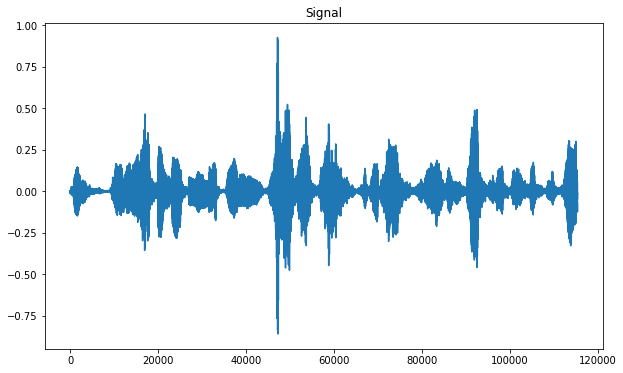

In [55]:
x, sr = librosa.load('test.wav')
plt.figure(figsize = (10, 6))
plt.title('Signal')
plt.plot(x)
plt.show()

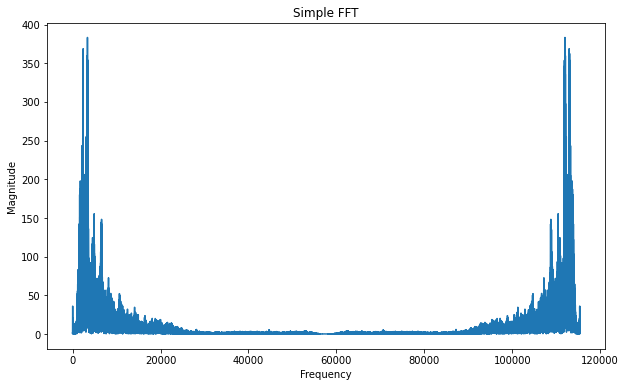

In [57]:
x, sr = librosa.load('test.wav')
plt.figure(figsize = (10, 6))
plt.plot(np.abs(np.fft.fft(x)))
plt.title('Simple FFT')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

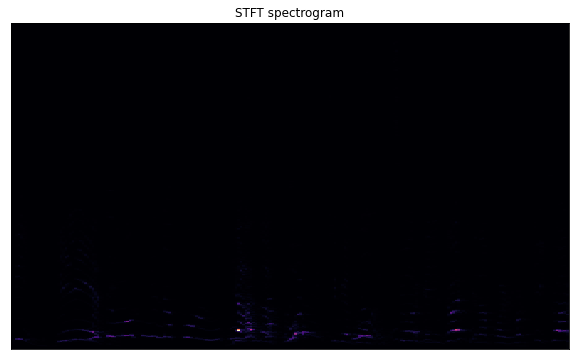

In [73]:
x, sr = librosa.load('test.wav')
plt.figure(figsize = (10, 6))
librosa.display.specshow(np.abs(librosa.core.stft(x, hop_length = 512, n_fft = 1024)))
plt.title('STFT spectrogram')
plt.show()

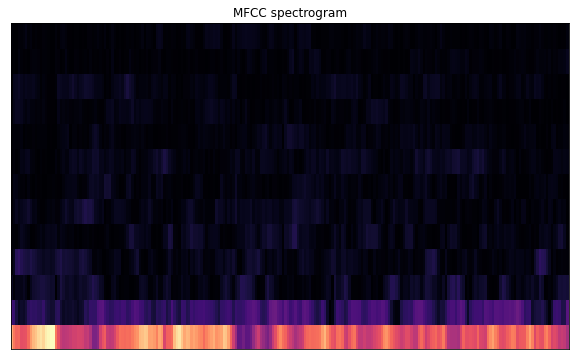

In [72]:
x, sr = librosa.load('test.wav')
plt.figure(figsize = (10, 6))
librosa.display.specshow(np.abs(librosa.feature.mfcc(x, hop_length = 512, n_fft = 1024, n_mfcc=13)))
plt.title('MFCC spectrogram')
plt.show()